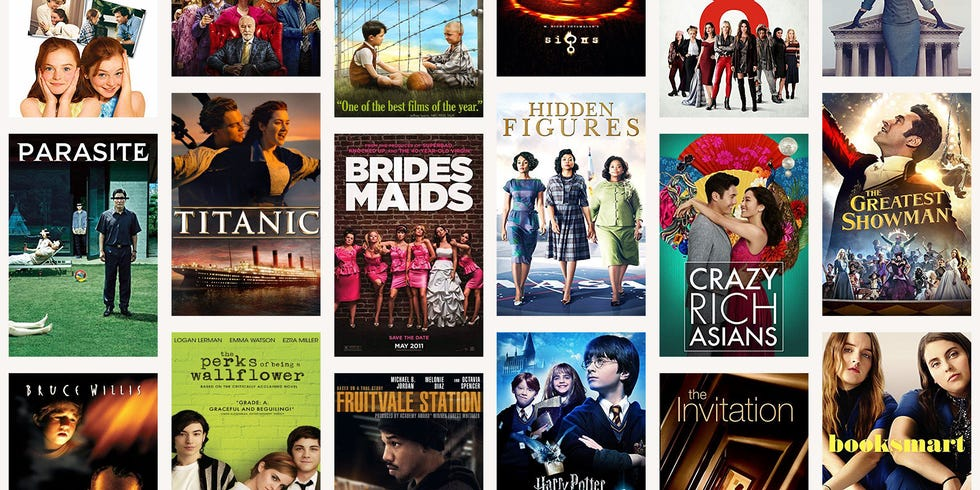

# Finding the Hollywood Formula, Movie Dataset Analysis

**By: Stephen Kipkurui, Ella Xu, Braeden Wright, Nick Dougherty**

***


# Executive Summary


   After the recent pandemic the movie industry has been slow to return to the volume that it once produced at.  Using open source movie databases, we set out to determine a movie's success based on its financial performance as well as its average viewer ratings.   Keeping an eye for any trends from previous successful movies, we then constructed a Machine Learning(ML) Model to predict the success of other movies.  
   All of this can be used to help determine how to better invest in projects going forwards and what parameters can be set to lead to a healthy return on investments. 


# Project Description

 Using the data available from the Metadata Movie Dataset, our team intends to compare different features of movies made between the year 2000 and present day in an attempt to determine the key features that might predict how successful the movie is(Success being measured by revenue). Once we explore the data, we will look for any trends that show over the past 2 decades that may have affected what makes a movie successful. In those 20 years, streaming has risen in popularity, consumer tastes have changed and even how movies are structured has changed(cinematic universes), all of which may have altered what causes a movie's success. Taking these into account, we can build a model that can predict a movie's success rate , thus giving insight into how to outline movies for maximum success in the theaters.

# Project Goal

It is now more than ever important to invest wisely, so our goal is to find the best 

# Initial Questions

1. Does the budget range directly correlate with revenue?
2. How does runtime affect movie success? 
3. What are the top 5 Highest Voted Movies?
4. What 5 movies made the largest revenue?
5. Are there specific genres that have been more successful

# Data Collection

We found an interesting dataset of more than 5000 data points consisting of 28 attributes describing IMDB movies here: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset.


We will be focusing our analysis around domestic gross, which is how much the film earned domestically at the box office during its initial run. This figure is in nominal terms, and will need to be transformed into real terms. Also, this figure exlcludes international earnings, as well as revenue from DVD rentals, television runs, etc. We will be focusing our analysis on films produced within the USA only.

# Import Menagerie

In [1]:
# Python functons/ modules, statistical, & visualization libraries
import libraries as lib

# Data Acquisition and Preparation

In [2]:
# Acquire & wrangle data
df = lib.fa.wrangle_df()
df.head()

Using cached CSV


title  success  success_rating                            genres  \
id                                                                              
5       Four Rooms        0        3.493750                      Crime Comedy   
6   Judgment Night        0        4.854775             Action Thriller Crime   
11       Star Wars        1      285.487448  Adventure Action Science Fiction   
12    Finding Nemo        1       38.013564                  Animation Family   
13    Forrest Gump        1       50.537748              Comedy Drama Romance   

      cast_actor_1      cast_actor_2     cast_actor_3  total_n_cast  \
id                                                                    
5         Tim Roth  Antonio Banderas   Jennifer Beals          24.0   
6   Emilio Estevez  Cuba Gooding Jr.      Denis Leary          15.0   
11     Mark Hamill     Harrison Ford    Carrie Fisher         106.0   
12   Albert Brooks   Ellen DeGeneres  Alexander Gould          24.0   
13       Tom Hanks      Robin Wright      Gary Sinise          66.0   

        budget      revenue  profit_amount  vote_average  vote_count  \
id                                                                     
5    4000000.0    4300000.0       300000.0           6.5       539.0   
6    8000000.0   12136938.0      4136938.0           6.4        79.0   
11  11000000.0  775398007.0    764398007.0           8.1      6778.0   
12  94000000.0  940335536.0    846335536.0           7.6      6292.0   
13  55000000.0  677945399.0    622945399.0           8.2      8147.0   

                                 production_companies  \
id                                                      
5                             MiramaxFilms ABandApart   
6   UniversalPictures LargoEntertainment JVCEntert...   
11       Lucasfilm TwentiethCenturyFoxFilmCorporation   
12                              PixarAnimationStudios   
13                                  ParamountPictures   

           production_countries  \
id                                
5         UnitedStatesofAmerica   
6   Japan UnitedStatesofAmerica   
11        UnitedStatesofAmerica   
12        UnitedStatesofAmerica   
13        UnitedStatesofAmerica   

                                             overview  popularity  runtime  \
id                                                                           
5   It's Ted the Bellhop's first night on the job....    9.026586     98.0   
6   While racing to a boxing match, Frank, Mike, J...    5.538671    110.0   
11  Princess Leia is captured and held hostage by ...   42.149697    121.0   
12  Nemo, an adventurous young clownfish, is unexp...   25.497794    100.0   
13  A man with a low IQ has accomplished great thi...   48.307194    142.0   

    profitable release_date  release_year    imdb_id     production_company  \
id                                                                            
5            0   1995-12-09          1995  tt0113101           MiramaxFilms   
6            0   1993-10-15          1993  tt0107286      UniversalPictures   
11           1   1977-05-25          1977  tt0076759              Lucasfilm   
12           1   2003-05-30          2003  tt0266543  PixarAnimationStudios   
13           1   1994-07-06          1994  tt0109830      ParamountPictures   

    is_genre_adventure  is_genre_horror  is_genre_drama  is_genre_scifi  \
id                                                                        
5                    0                0               0               0   
6                    0                0               0               0   
11                   1                0               0               1   
12                   0                0               0               0   
13                   0                0               1               0   

    is_genre_romance  is_genre_thriller  is_genre_crime  is_genre_comedy  \
id                                                                         
5                

In [3]:
# Dataframe Shape

df.shape

(7282, 36)

In [4]:
# Spit dataframe into train, validate & test

train, validate, test = lib.fa.train_validate_test_split(df)
train.shape, validate.shape, test.shape

((4077, 36), (1748, 36), (1457, 36))

# Exploration

## What are the distribution for continuous variable? 

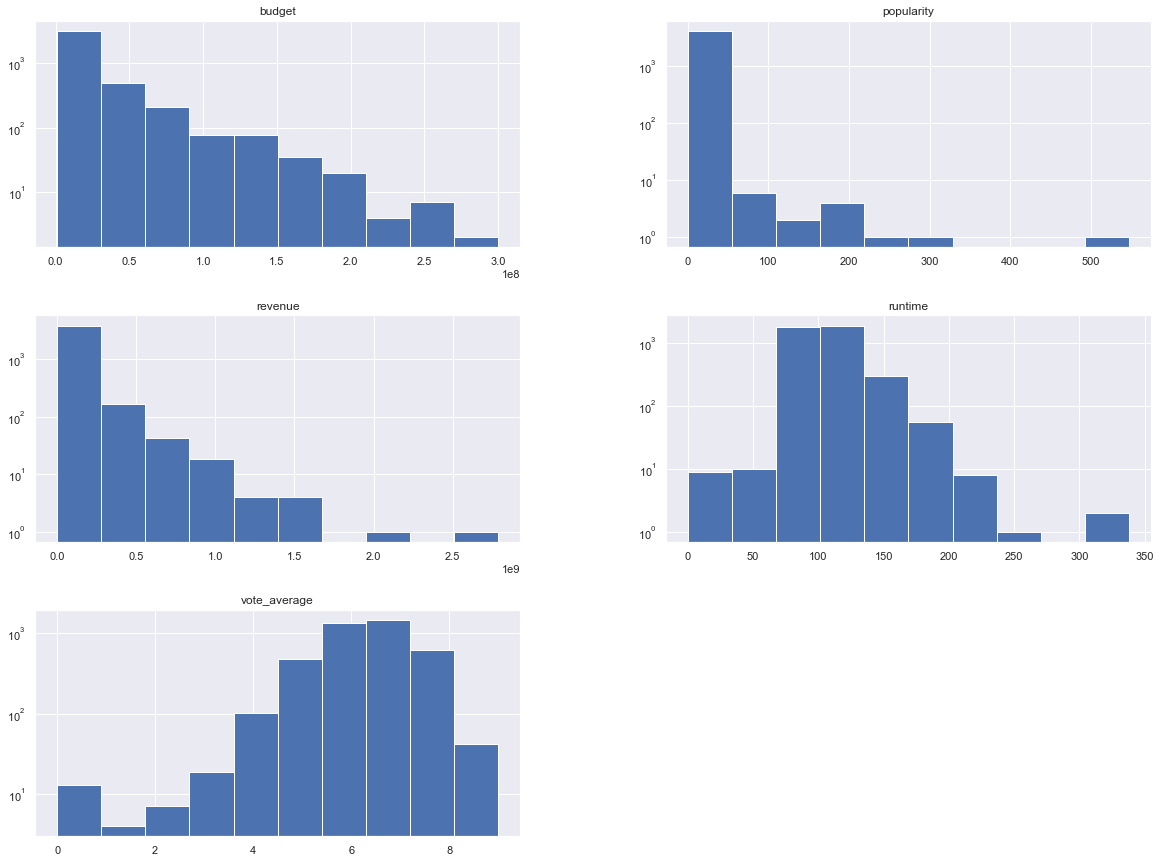

In [5]:
# Continuos Features 

num_features = ['budget', 'popularity', 'revenue', 'runtime']
train[num_features + ['vote_average']].hist(figsize=(20,15), log=True);

## 1.  Is there a relationship between budget and revenue?

In [6]:
# Import plotly library
import plotly.express as px 

# Plot visual revenue vs budget
fig = px.scatter(train, x="budget", y="revenue", trendline="ols", title="Relationship between Budget and Revenue")
fig.update_layout(xaxis_title="Budget", 
                 yaxis_title="Revenue")
fig.show()

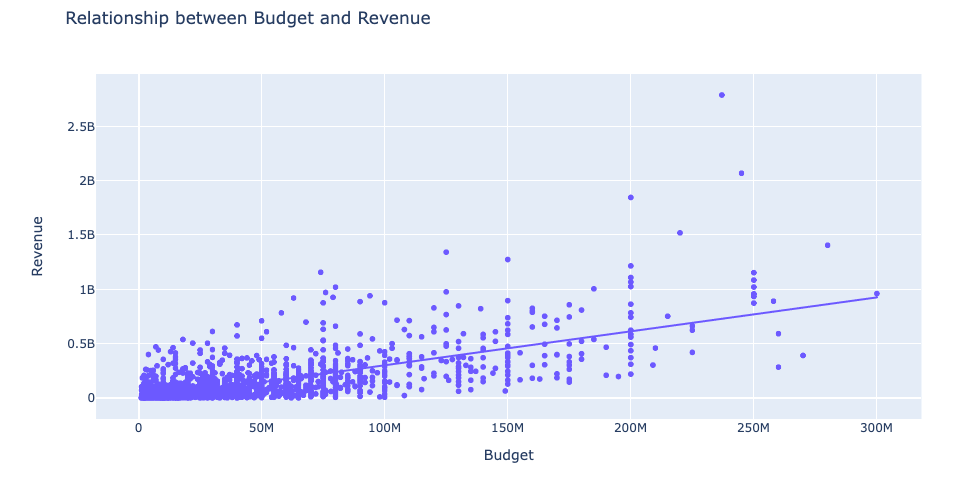

In [7]:
# Set alpha level
alpha = 0.05

# PearsonR Correlation test
corr, p = lib.stats.pearsonr(train.budget, train.revenue)

# T-test 
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Takeaways: There are some relationship between budget and revenue. So we have reject the null hypothesis. From the visual above, we can tell that there is a linear relationship between budget and revenue. 

## 2. Correlation heatmap of all features including the target. 

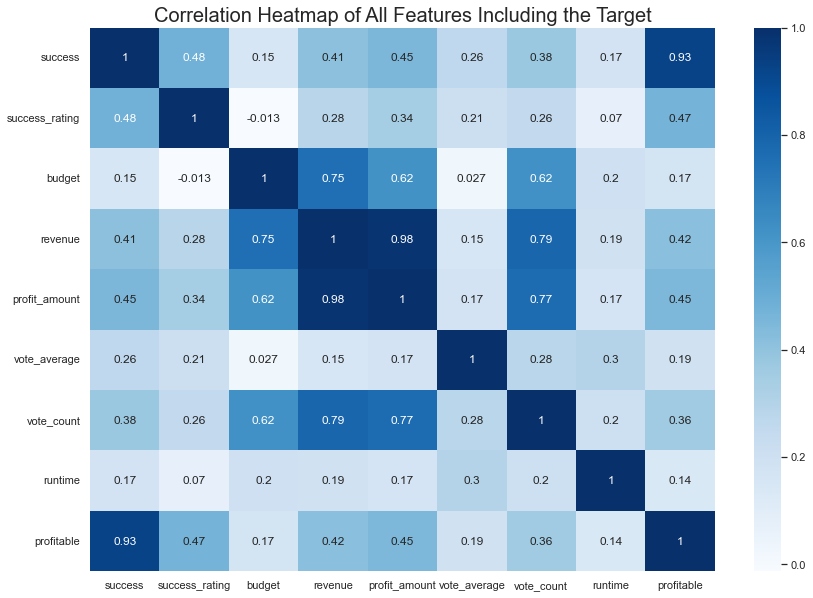

In [8]:
# Heatmap plot
subset = train[['title', 'success', 'success_rating', 'genres','budget', 'revenue',
       'profit_amount', 'vote_average', 'vote_count', 'production_companies',
       'production_countries', 'overview',  'runtime',
       'profitable', 'release_date']]

# Heatmap to display correlation of the features and logerror.
lib.plt.figure(figsize=(14, 10))# set up the figure size. 
lib.sns.heatmap(subset.corr(), cmap='Blues', annot=True)# set up the heatmap, including color and annot. 
lib.plt.title('Correlation Heatmap of All Features Including the Target', fontsize=20) # set upt the title and front size 
lib.plt.show()

Takeaways: There are a couple of features that related with movie success, such as runtime, vote_count, vote_average, profit amount and budget, we will look into them a bit deeper. 

## 3. What are the top 5 highest voted movies?

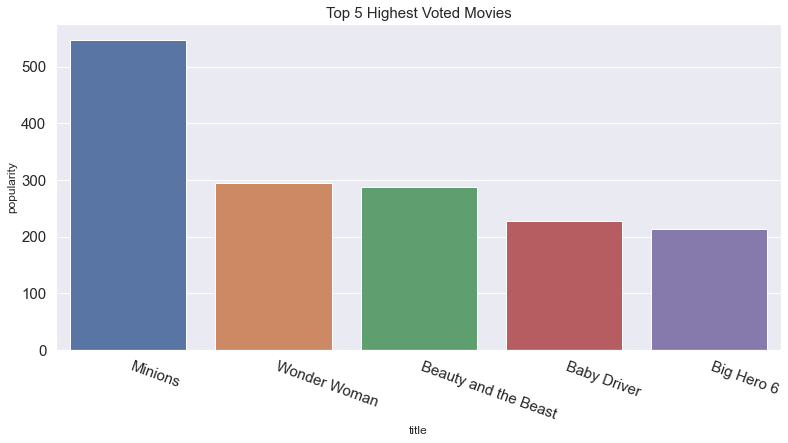

In [9]:
cols = ['title', 'popularity']
popularity_df = df.sort_values('popularity', ascending=False)[cols].set_index('title')
top_5 = popularity_df.head(5)
lib.sns.barplot(data=top_5, x=top_5.index, y='popularity');
lib.plt.xticks(ha='left', rotation=-20, fontsize=15); 
lib.plt.yticks(fontsize=15)
lib.plt.title('Top 5 Highest Voted Movies', fontsize=15);
lib.plt.show()

Takeaways: The most popular movies, most voted movies are Minions, Wonder Woman, in order for us to duplicate a movie's success, we can further to investigate. 

## 4. Top 5 highest revenue movies?

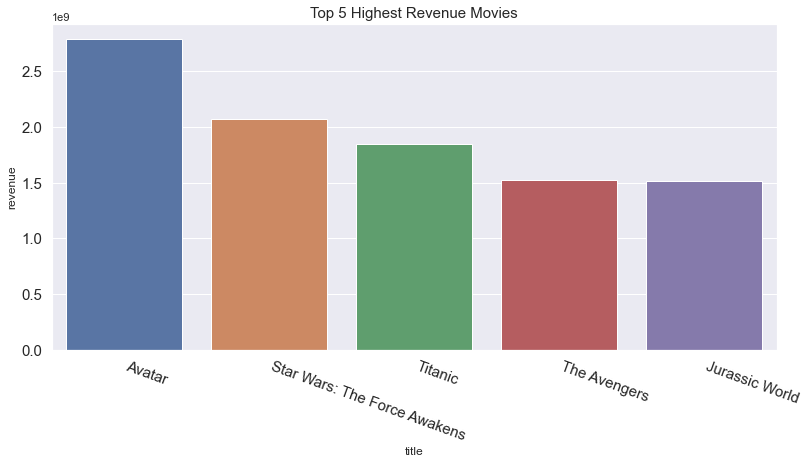

In [10]:
cols = ['title', 'revenue']
revenue_df = df.sort_values('revenue', ascending=False)[cols].set_index('title')
top_5 = revenue_df.head(5)
lib.sns.barplot(data=top_5, x=top_5.index, y='revenue');
lib.plt.xticks(ha='left', rotation=-20, fontsize=15); 
lib.plt.yticks(fontsize=15)
lib.plt.title('Top 5 Highest Revenue Movies', fontsize=15)
lib.plt.show()

Takeaways: After researching little deeper, the action, adventure genres are often more profitable, let's goupby the genres and take a closer look.  

## 5. Which top 5 genres have the highest profit?

In [11]:
# Movies genres Frequency 

genres_columns = ['is_genre_adventure', 'is_genre_horror',
       'is_genre_drama', 'is_genre_scifi', 'is_genre_romance',
       'is_genre_thriller', 'is_genre_crime', 'is_genre_comedy',
       'is_genre_animation', 'is_genre_action', 'is_genre_mystery',
       'is_genre_fantasy', 'is_genre_documentary']
xticks = ['Adventure', 'Horor','Drama','Sci-Fi','Romance',
          'Thriller','Crime','Comedy','Annimation','Action',
          'Mystery','Fantasy','Documentary',]
output = []

for col in genres_columns:
    columns_sum = train[train[col] == 1].profit_amount.sum()
    output.append({col: columns_sum})
pd.DataFrame(output).sum().plot.bar(color = 'b') 

lib.plt.xticks(rotation = 90)
lib.plt.title('Movies Genres Frequency', size = 16)
lib.plt.xlabel('Movie Genres', size = 16)
lib.plt.ylabel('Profit (USD)', size = 16)
lib.plt.show()

NameError: name 'pd' is not defined

### One-Sample T-Test
#### Statisitical Testing to Verify Our Alternative Hypothesis

In [ ]:
H0 = 'Mean profit for top 5 successful movies = mean profit for all movies'
H1 = 'Mean profit for top 5 successful movies != mean profit for all movies'
top_5_most_profitable = train.nlargest(n = 5, columns = ['profit_amount'])

overall_movie_profit_mean = df.profit_amount.mean()
top_5_movies_profit = top_5_most_profitable.profit_amount

t, p = lib.stats.ttest_1samp(top_5_movies_profit, overall_movie_profit_mean)
if (p/2 < alpha):
    print(f'Reject the null hypothesis')
else:
    print(f'Failed to Reject null hypothesis')

Takeaways: Action and adventure appear most profitable followed by comedy and drama. Least profitable genres are horror and mystery. Possible further evaluate movies in top successful genres.

## Key Findings

This exploration covers movies released from the year 1915 to 2017 as marketed across the globe.
* The total __overall budget for all movies is 102.8 billion US dollar__
* Total __overall revenue gained 277.4 billion US dollar__.
* In terms of profit, the top profitable genres are action, adventure, commedy, drama....
* There is linear relationship between budget and profit, as the budget of a movie production go up, the revenue amount is also likely to go up.
* There are a couple of features that related with movie success, such as runtime, vote_count, vote_average, profit amount and budget, we will look into them a bit deeper. 
* The top-five most sucessful movies account for __2.72% of total revenue__. There are:
    
    - 1). Avatar 
    - 2). Star Wars: The Forse Awakens 
    - 3). Titanic
    - 4). The Avengers
    - 5). Jurrasic World
    
* The movies genres revenues (USD):

| __Gained Revenue Ranking__ | __Genre__  | __Budget__ | __Revenue__ | __Profits(USD)__ | __% Absolute Profit Gain__ |
|:----------- | :---------------------- | :-------------: | :-------------: | :-------------: |-------------: |
| 1 | __Action__  | 40.83B  | 115.09B  | 74.26B| 73.81% |
| 2 | __Adventure__  | 34.25B | 108.26B  | 74.01B | 75.97% |
| 3 | __Comedy__  | 31.64B  | 88.20B  | 56.56B | 73.60% |
| 4 | __Drama__  | 38.32B  | 86.47B  | 48.16B | 69.29% |
| 5 | __Thriller__  | 29.10B  | 70.42B  | 41.32B | 70.76% |
| 6 | __Fantasy__  | 17.80B  | 	55.22B  | 37.42B | 75.81% |
| 7 | __Sci-Fi__  | 18.56B | 54.77B  | 36.21B | 74.69% |
| 8 | __Annimation__  | 10.85B  | 36.73B | 25.88B | 77.20% |
| 9 | __Romance__  | 13.70B  | 37.39B  | 23.69B | 89.16% |
| 10 | __Crime__  | 14.47B  | 33.34B  | 18.89B | 69.73% | 
| 11 | __Horor__ | 6.40B | 17.69B | 11.29B | 73.43% |
| 12 | __Mystery__  | 	7.76B  | 18.87B  | 11.11B | 70.86% |
| 13 | __Documentary__  | 8.63M  | 	934.26M  | 925.63M| 99.08% |

- Drama is the most frequent genre by count volume followed by comedy 
- Least popular by count volume is documentary 


# Modeling

Exploration phase identified arrays of possible divers for a movie success. In this section, we will create a machine learning algorithm model that better predicts movie success and use our findings as recommendations for our stakeholders. Three supervised machine learning classifications models were created in this project:  

- Logistic regression
- K-Nearest Neighbor (KNN)
- Decision tree

A baseline model for our project was created from engineered columns of success as a measure of overall performance of the models above. Our defination of a successful movie is guided by financial metrics a movie generates as captured by the dataset and 'perceived success' as expressed by features such as ratings, votes among othes. As is, the dataset baseline movie success accounts to 62.09%. 

The following sections will tabulate the models results over the train and validat subset and later test the best model over test subset to limit data leakage.


#### Train set

<style>
    table {
        display: inline-block
    }
</style>

| Model  | Acuracy | Precison | Recall |
| :------ | :------ | :------ | |
| Baseline  | 0.6209 |  0.6209 |0.6209 |
| Decision Tree  | 0.7631  | 0.7644  | 0.5929 |
| Logistic Regression  | 07784 | 0.8327  | 0.5630 |
| K-Nearest Neighbor  | 07595  | 0.7662  | 0.5936 |



#### Validate set

<style>
    table {
        display: inline-block
    }
</style>

| Model  | Acuracy | Precison | Recall |
| :------ | :------ | :------ | |
| Baseline  | 0.6209 |  0.6209 |0.6209 |
| Decision Tree  | 0.7601  | 0.7170  | 0.6703 |
| Logistic Regression  | 0.7589 | 0.8093  | 0.4952 |
| K-Nearest Neighbor  | 07674  | 0.7405  | 0.6325|

### A gragh showing relations of true positive predictions over false positives.
- True positive (correctly predicted positive values) account to about 75%.
- False negatives actual negatives that erronously classified as positives
  
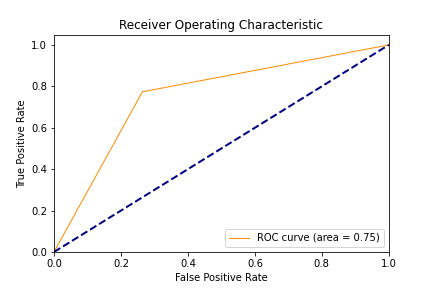

#### Test set (best model)

<style>
    table {
        display: inline-block
    }
</style>

| Model  | Acuracy | Precison | Recall |
| :------ | :------ | :------ | |
| Baseline  | 0.6209 |  0.6209 |0.6209 |
| Logistic Regression   | 0.7454  | 0.7736  | 0.4982|


#### Best model is logistic regession based on precision metrics. Our formulated model beats the baseline of 62.09% by 15.27 percentile points. 

## Project Takeaways and Recomendations 

In summary, our team was sucessful in infering valuable information from our explored dataset. Our best model- Logistic regression model predicted movie success with over 15% precision point over baseline at 77.36%. 

Our recommendations to our stakeholders is that there is some correlation of higher budget with predicted movie success. Board decision on choice of movie genres could be guided by scientific findings. This project inferes that action is the most profitable category followed closely by adventure and 3rd comedy. 

Least profitable genres are documentary and mystery. Future project versions intents to understand drivers for the low success in these least performing categories and offer guindance on measures to improve.



## Future Explorations
- Time series analysis for movies genres profitability over time
- Natural language processing with stopwords that better predict a movie success
- Explore the effect of movie actors in prediction of movie success
- Explore the least performing genres to infer drivers for under-perfomance. 